In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
import cv2

In [ ]:
# Load dataset (MNIST but filter only 0 & 1, then resize to 20×20)

In [15]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Filter only digits 0 and 1
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

# Resize 28x28 → 20x20
X_train_resized = np.array([cv2.resize(img, (20, 20)) for img in X_train])
X_test_resized = np.array([cv2.resize(img, (20, 20)) for img in X_test])

# Normalize to 0–1
X_train_resized = X_train_resized / 255.0
X_test_resized = X_test_resized / 255.0

# Flatten into 400-dim vectors
X_train_flat = X_train_resized.reshape(X_train_resized.shape[0], 400)
X_test_flat = X_test_resized.reshape(X_test_resized.shape[0], 400)

print("Training shape:", X_train_flat.shape)
print("Test shape:", X_test_flat.shape)


11490434/11490434 [==============================] - 2s 0us/step
Training shape: (12665, 400)
Test shape: (2115, 400)


In [28]:
y_train

array([0, 1, 1, ..., 1, 0, 1], dtype=uint8)

In [16]:
# Build a simple logistic regression model in TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(400,)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 401       
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Train the model
history = model.fit(X_train_flat, y_train, epochs=10,
                    batch_size=32, validation_split=0.1)


Epoch 1/10
357/357 [==============================] - 1s 911us/step - loss: 0.2058 - accuracy: 0.9557 - val_loss: 0.0649 - val_accuracy: 0.9929
Epoch 2/10
357/357 [==============================] - 0s 655us/step - loss: 0.0457 - accuracy: 0.9952 - val_loss: 0.0305 - val_accuracy: 0.9968
Epoch 3/10
357/357 [==============================] - 0s 682us/step - loss: 0.0260 - accuracy: 0.9966 - val_loss: 0.0196 - val_accuracy: 0.9968
Epoch 4/10
357/357 [==============================] - 0s 630us/step - loss: 0.0182 - accuracy: 0.9970 - val_loss: 0.0138 - val_accuracy: 0.9984
Epoch 5/10
357/357 [==============================] - 0s 630us/step - loss: 0.0139 - accuracy: 0.9977 - val_loss: 0.0107 - val_accuracy: 0.9984
Epoch 6/10
357/357 [==============================] - 0s 639us/step - loss: 0.0113 - accuracy: 0.9977 - val_loss: 0.0084 - val_accuracy: 0.9992
Epoch 7/10
357/357 [==============================] - 0s 647us/step - loss: 0.0095 - accuracy: 0.9982 - val_loss: 0.0068 - val_accuracy:

In [12]:

# Load your image
img_path = "/home/ankit.verma/Pictures/Screenshots/Screenshot from 2025-09-14 14-30-56.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [18]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test_flat, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


67/67 - 0s - loss: 0.0037 - accuracy: 0.9995 - 41ms/epoch - 606us/step
Test accuracy: 0.9995


In [13]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

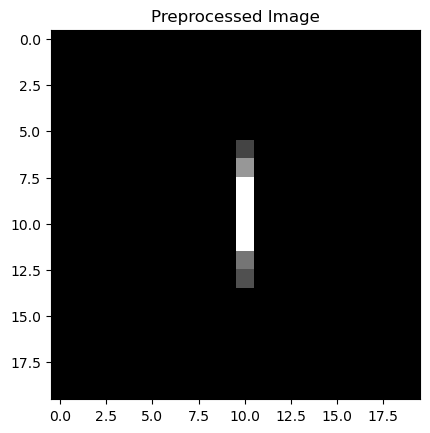

In [24]:
# Load & preprocess your image
# Invert colors if background is white and digit is dark
# (MNIST digits are white on black)
img = cv2.bitwise_not(img)


# Resize to 20x20
img_resized = cv2.resize(img, (20, 20))

# Normalize
img_resized = img_resized / 255.0

plt.imshow(img_resized, cmap="gray")
plt.title("Preprocessed Image")
plt.show()

In [26]:
# Flatten to 400 features
img_flat = img_resized.reshape(1, 400)

# Predict probability
prob = model.predict(img_flat)[0][0]
prob
prediction = 1 if prob >= 0.1 else 0

print(f"Predicted digit: {prediction}, Probability of being '1': {prob:.4f}")

1/1 [==============================] - 0s 21ms/step
Predicted digit: 1, Probability of being '1': 0.9612


In [ ]:
# Load the trained model & predict